In [ ]:
pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
pip install torchvision

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    names = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_COLOR)
        if img is not None:
            names.append(filename)
            images.append(img)
    return names, images

# Specify the directory containing the images
directory1 = '/content/drive/My Drive/Train_Test/train'
directory2 = '/content/drive/My Drive/Train_Test/test'

# Load the images
name1,loaded_train = load_images_from_folder(directory1)
name2,loaded_test = load_images_from_folder(directory2)


In [ ]:
# Display the shape of each loaded image array
for img in loaded_train:
    print(img.shape)


(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 

In [ ]:
from PIL import Image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_transformed_images = [transform(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))) for img in loaded_train]
test_transformed_images = [transform(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))) for img in loaded_test]

# Convert the list of tensors to a single tensor
train_tensor_images = torch.stack(train_transformed_images)
test_tensor_images = torch.stack(test_transformed_images)


dataset_train = TensorDataset(train_tensor_images, train_tensor_images)
dataset_test = TensorDataset(test_tensor_images, test_tensor_images)

batch_size = 10
trainloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
testloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
class Autoencoder(nn.Module):
    class Encoder(nn.Module):
        def __init__(self):
            super(Autoencoder.Encoder, self).__init__()
            self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
            self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
            self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
            self.conv3 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding=1)
            self.fc = nn.Conv2d(in_channels=32, out_channels=3, kernel_size=1)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            x = self.pool(x)
            x = F.relu(self.conv2(x))
            x = F.relu(self.conv3(x))
            x = self.fc(x)
            return x

    class Decoder(nn.Module):
        def __init__(self):
            super(Autoencoder.Decoder, self).__init__()
            self.fc = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=1)
            self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
            self.upsample = nn.Upsample(scale_factor=2, mode='nearest')
            self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
            self.conv3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
            self.output_conv = nn.Conv2d(in_channels=64, out_channels=3, kernel_size=3, padding=1)

        def forward(self, x):
            x = self.fc(x)
            x = F.relu(self.conv1(x))
            x = self.upsample(x)
            x = F.relu(self.conv2(x))
            x = F.relu(self.conv3(x))
            x = torch.sigmoid(self.output_conv(x))
            return x

    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = self.Encoder()
        self.decoder = self.Decoder()

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Instantiate the Autoencoder
autoencoder = Autoencoder()

# Print the autoencoder model
print(autoencoder)


Autoencoder(
  (encoder): Encoder(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fc): Conv2d(32, 3, kernel_size=(1, 1), stride=(1, 1))
  )
  (decoder): Decoder(
    (fc): Conv2d(3, 3, kernel_size=(1, 1), stride=(1, 1))
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (upsample): Upsample(scale_factor=2.0, mode='nearest')
    (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (output_conv): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
)


In [ ]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Example DataLoader (replace with your actual DataLoader)
# from torch.utils.data import DataLoader, TensorDataset
# example_data = torch.randn(100, 3, 224, 224)  # Example data, replace with your dataset
# example_dataloader = DataLoader(TensorDataset(example_data, example_data), batch_size=10)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0

    for data in trainloader:
        inputs, _ = data
        optimizer.zero_grad()

        # Forward pass
        encoded = autoencoder.encoder(inputs)
        outputs = autoencoder.decoder(encoded)
        loss = criterion(outputs, inputs)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader)}")

print("Finished Training")


Epoch [1/10], Loss: 0.020290575783400894
Epoch [2/10], Loss: 0.001408332727289995
Epoch [3/10], Loss: 0.0006486722728612818
Epoch [4/10], Loss: 0.0005154471725847488
Epoch [5/10], Loss: 0.0004452329825952218
Epoch [6/10], Loss: 0.0004481951097537305
Epoch [7/10], Loss: 0.000404798891829716
Epoch [8/10], Loss: 0.0004050707850264691
Epoch [9/10], Loss: 0.00042137640954947463
Epoch [10/10], Loss: 0.0003750362406778427
Finished Training


In [ ]:
torch.save(autoencoder.state_dict(), 'autoencoder.pth')

In [ ]:
autoencoder = Autoencoder()

# Load the saved state dictionary into the model
autoencoder.load_state_dict(torch.load('autoencoder.pth'))

autoencoder.eval()


In [ ]:
def visualize_reconstructions(autoencoder, test_loader, num_images=5):
    autoencoder.eval()  # Set the model to evaluation mode
    images, reconstructions, encoded_images = [], [], []

    with torch.no_grad():
        for data in test_loader:
            inputs, _ = data
            encoded = autoencoder.encoder(inputs)
            outputs=autoencoder.decoder(encoded)
            images.append(inputs)
            reconstructions.append(outputs)
            encoded_images.append(encoded)
            if len(images) >= num_images:
                break

    images = torch.cat(images)[:num_images]
    reconstructions = torch.cat(reconstructions)[:num_images]
    encoded_images = torch.cat(encoded_images)[:num_images]

    fig, axes = plt.subplots(3, num_images, figsize=(15, 7))
    for i in range(num_images):
        # Original images
        axes[0, i].imshow(images[i].permute(1, 2, 0).cpu().numpy())
        axes[0, i].axis('off')
        axes[0, i].set_title('Original')

        # Reconstructed images
        axes[1, i].imshow(reconstructions[i].permute(1, 2, 0).cpu().numpy())
        axes[1, i].axis('off')
        axes[1, i].set_title('Reconstructed')

        # Encoded images (feature representations)
        encoded_image = encoded_images[i].squeeze().cpu().numpy()  # Assuming the encoded shape is (batch_size, channels, height, width)
        axes[2, i].imshow(encoded_images[i].permute(1, 2, 0).cpu().numpy())
        axes[2, i].axis('off')
        axes[2, i].set_title('Encoded')

    plt.tight_layout()
    plt.show()


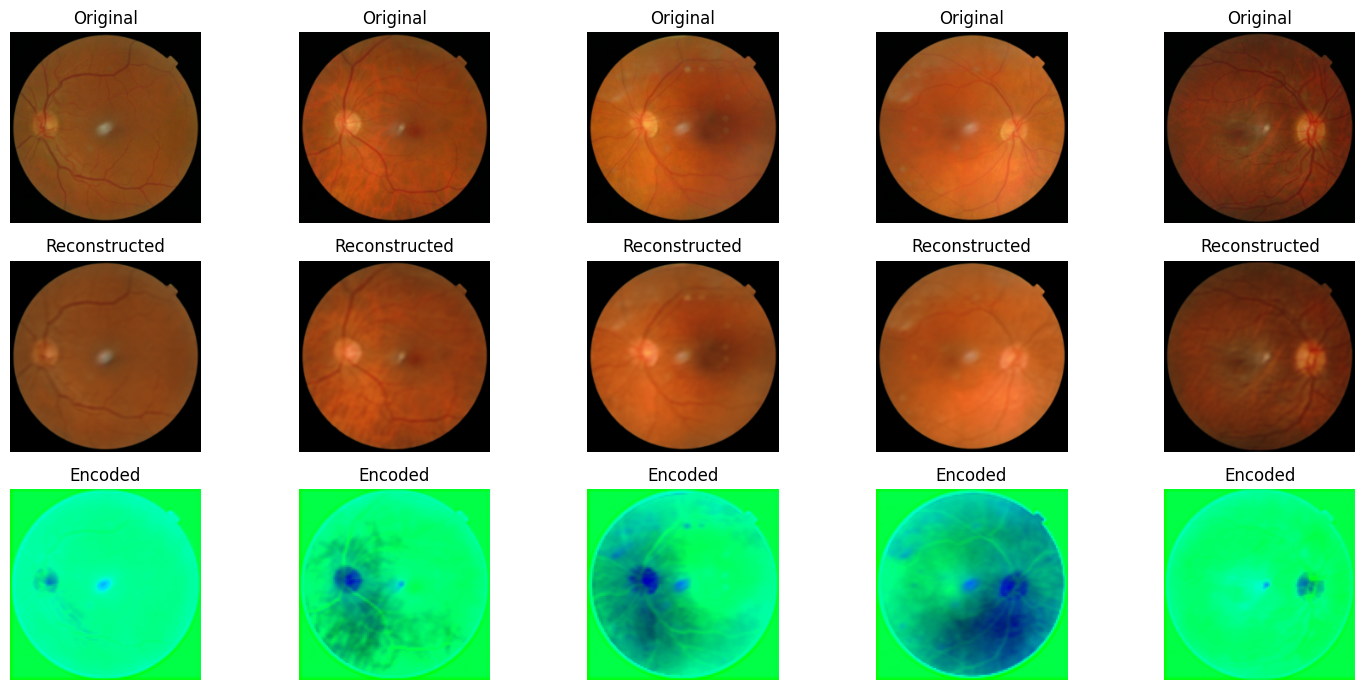

In [ ]:
# Assuming test_loader is your DataLoader for the test dataset
visualize_reconstructions(autoencoder, testloader)


In [ ]:
pip install pycryptodome numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00


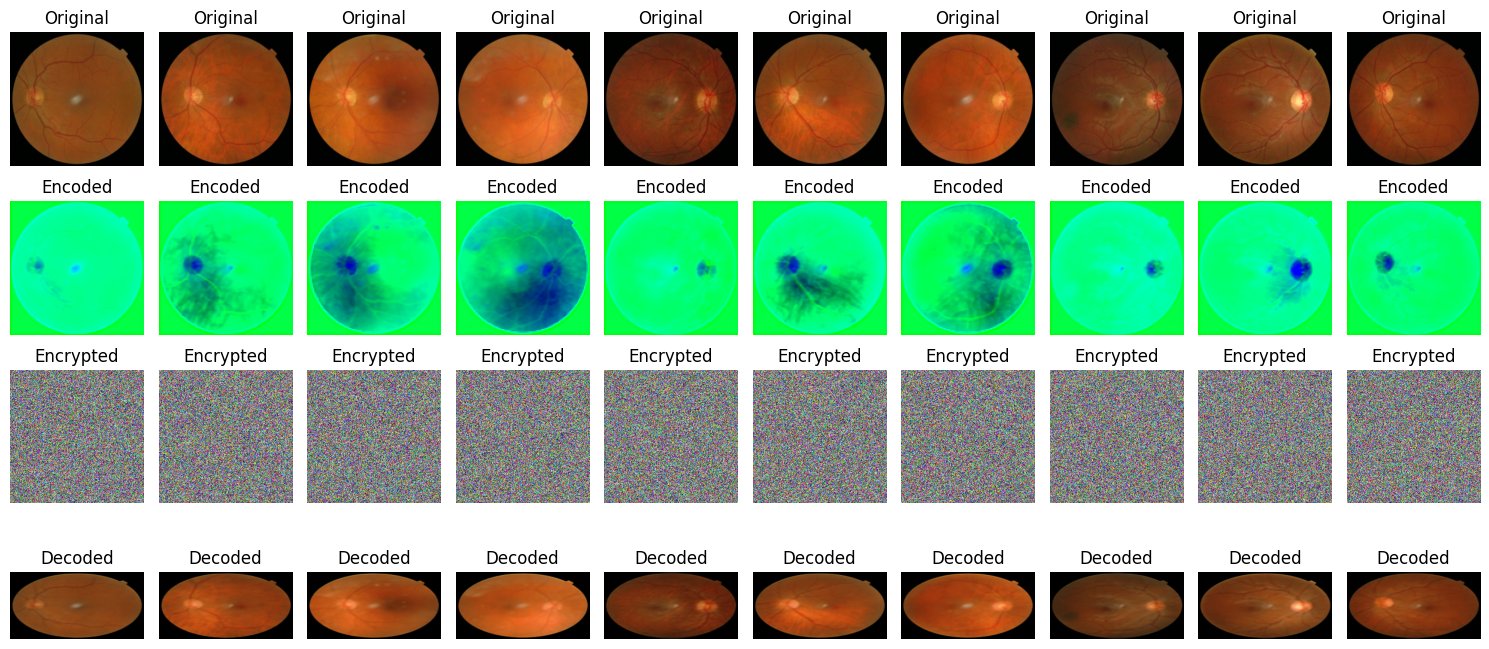

In [ ]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import matplotlib.pyplot as plt
import numpy as np

# AES encryption function
def encrypt_image(key, data):
    cipher = AES.new(key, AES.MODE_CTR)
    nonce = cipher.nonce
    encrypted_data = cipher.encrypt(data)
    return encrypted_data, nonce

# AES decryption function
def decrypt_image(key, encrypted_data, nonce):
    cipher = AES.new(key, AES.MODE_CTR, nonce=nonce)
    decrypted_data = cipher.decrypt(encrypted_data)
    return decrypted_data

# Generate a random 256-bit (32-byte) encryption key
key = get_random_bytes(32)

# Get the first 10 images from the test loader
images, _ = next(iter(testloader))
images = images[:10]

en,encry,d=[],[],[]


# Iterate over each image
for image in images:
    encoded_image = autoencoder.encoder(image)
    encoded_image = encoded_image.squeeze().detach().cpu().numpy()
    en.append(encoded_image)

    # Convert PyTorch tensor to bytes
    image_bytes = encoded_image.tobytes()

    # Encrypt the image
    encrypted_image, nonce = encrypt_image(key, image_bytes)

    # Convert encrypted bytes back to a numpy array of the original shape
    encrypted_image_array = np.frombuffer(encrypted_image, dtype=np.uint8).reshape(image.shape)
    encrypted_image_tensor = torch.tensor(encrypted_image_array)
    encry.append(encrypted_image_tensor)

    # Decrypt the image
    decrypted_image = decrypt_image(key, encrypted_image, nonce)

    # Convert decrypted bytes back to the original shape
    decrypted_image_array = np.frombuffer(decrypted_image, dtype=encoded_image.dtype).reshape(encoded_image.shape)
    decrypted_image_tensor = torch.tensor(decrypted_image_array)
    decrypted_image_tensor = decrypted_image_tensor.type(torch.float)

    decoded_image = autoencoder.decoder(decrypted_image_tensor)
    d.append(decoded_image)

fig, axes = plt.subplots(4,10, figsize=(15, 7))
for i in range(10):
    axes[0, i].imshow(images[i].permute(1, 2, 0).cpu().numpy())
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    axes[1, i].imshow(torch.from_numpy(en[i]).permute(1, 2, 0).cpu().numpy())
    axes[1, i].axis('off')
    axes[1, i].set_title('Encoded')

    axes[2, i].imshow(encry[i].permute(1, 2, 0).cpu().numpy())
    axes[2, i].axis('off')
    axes[2, i].set_title('Encrypted')

    axes[3, i].imshow(d[i].permute(1, 2, 0).cpu().detach().numpy())
    axes[3, i].axis('off')
    axes[3, i].set_title('Decoded')

plt.tight_layout()
plt.show()
